# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv(r'C:\Users\DELUX\Desktop\publicaciones\1_DataScoutingClustering\1_MedioCentroCreativo\df\df_pca.csv',decimal=',')

In [3]:
df.shape

(192, 28)

In [4]:
df.columns

Index(['id_jugador', 'jugador', 'equipo', 'feat1', 'feat2', 'feat3', 'feat4',
       'feat5', 'feat6', 'feat7', 'feat8', 'feat9', 'feat10', 'feat11',
       'minJug', 'feat1N', 'feat2N', 'feat3N', 'feat4N', 'feat5N', 'feat6N',
       'feat7N', 'feat8N', 'feat9N', 'feat10N', 'feat11N', 'PCA1', 'PCA2'],
      dtype='object')

In [5]:
X_df = df[['feat1N','feat3N','feat4N','feat7N','feat8N','feat9N']]

In [6]:
z = linkage(X_df, 'ward')

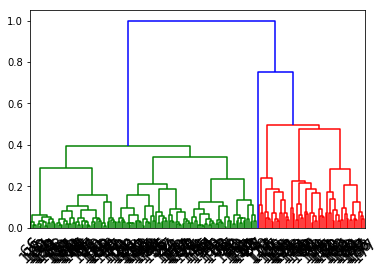

In [7]:
dendogram = dendrogram(z,leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.show();

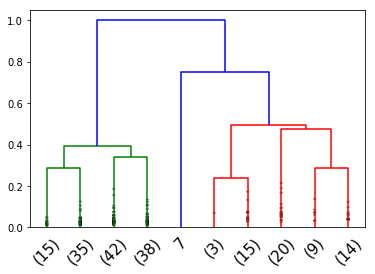

In [8]:
dendogram = dendrogram(z,truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.show();

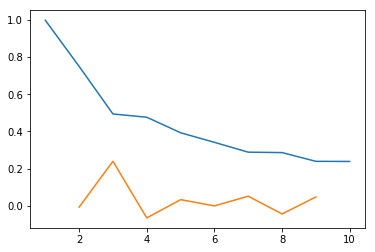

clusters: 3


In [9]:
last = z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [10]:
k = 3
clusters = fcluster(z, k, criterion='maxclust')

In [11]:
df['clusters'] = clusters

In [12]:
df.head()

,id_jugador,jugador,equipo,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat5N,feat6N,feat7N,feat8N,feat9N,feat10N,feat11N,PCA1,PCA2,clusters
0,10316,Joaquín Sánchez Rodríguez,Real Betis,2.284534,0.265643,0.847518,2.550177,1.381346,1.646989,2.337662,...,0.078742,0.061810,0.142576,0.103016,0.000000,0.040928,0.066621,0.033020,0.021034,2
1,14464,Aritz Aduriz,Athletic Club,0.860786,0.286929,0.623377,0.191286,0.573858,2.199787,0.669501,...,0.032712,0.082557,0.040834,0.034871,0.000000,0.008596,0.089031,-0.079069,-0.024395,1
2,17679,Sergio García,Espanyol,2.118359,0.302623,0.685649,0.968393,1.513114,2.844654,1.634163,...,0.086253,0.106758,0.099669,0.073222,0.033196,0.031083,0.058087,-0.000206,-0.002051,1
3,17740,Jesús Navas,Sevilla,3.750000,0.132743,0.770099,1.161504,0.696903,0.564159,1.393805,...,0.039726,0.021173,0.085010,0.092945,0.036403,0.055390,0.068726,0.017222,0.026605,1
4,17804,Juan Francisco Torres Belén,Atlético de Madrid,2.293350,0.055935,0.822078,0.615289,0.727160,0.671224,1.118707,...,0.041451,0.025191,0.068231,0.064889,0.000000,0.023699,0.058047,-0.043464,0.011673,1


In [13]:
df.columns

Index(['id_jugador', 'jugador', 'equipo', 'feat1', 'feat2', 'feat3', 'feat4',
       'feat5', 'feat6', 'feat7', 'feat8', 'feat9', 'feat10', 'feat11',
       'minJug', 'feat1N', 'feat2N', 'feat3N', 'feat4N', 'feat5N', 'feat6N',
       'feat7N', 'feat8N', 'feat9N', 'feat10N', 'feat11N', 'PCA1', 'PCA2',
       'clusters'],
      dtype='object')

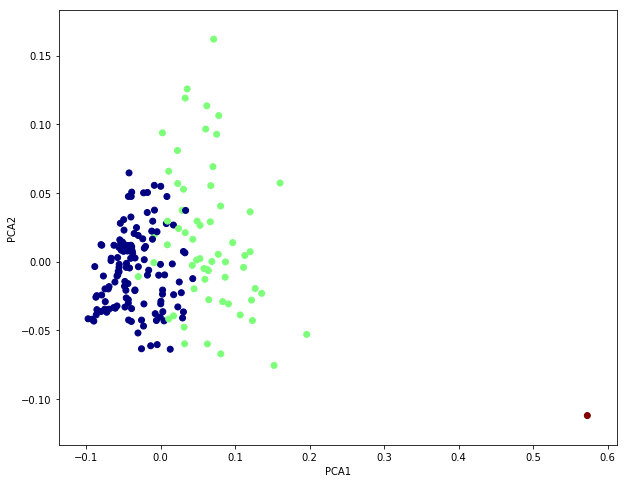

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'],df['PCA2'], c=clusters, cmap='jet')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [21]:
df[df['jugador']=='Éver Banega']

,id_jugador,jugador,equipo,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat5N,feat6N,feat7N,feat8N,feat9N,feat10N,feat11N,PCA1,PCA2,clusters
29,49309,Éver Banega,Sevilla,9.181614,0.235426,0.854137,1.984305,1.042601,1.446188,1.748879,...,0.059432,0.054275,0.106666,0.073573,0.036893,0.207701,0.060614,0.060505,0.096557,2


In [17]:
df.sort_values('clusters')

,id_jugador,jugador,equipo,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat5N,feat6N,feat7N,feat8N,feat9N,feat10N,feat11N,PCA1,PCA2,clusters
95,96785,Óscar Plano,Real Valladolid,1.936202,0.267062,0.767834,0.867953,0.701039,2.169881,1.001484,...,0.039962,0.081434,0.061082,0.055324,0.000000,0.033003,0.070474,-0.045780,-0.001314,1
107,104448,Anthony Lozano,Girona,0.868966,0.124138,0.677778,0.620690,1.737931,2.482759,0.496552,...,0.099069,0.093176,0.030285,0.016458,0.000000,0.012751,0.057102,-0.079884,-0.036406,1
108,105064,Jozabed Sánchez,Celta de Vigo,6.067416,0.000000,0.849218,0.388937,0.233362,1.011236,0.466724,...,0.013303,0.037951,0.028466,0.063167,0.000000,0.147811,0.069445,-0.042376,0.064592,1
109,106899,Roque Mesa,Sevilla,4.022923,0.206304,0.874179,1.186246,0.515759,1.856734,0.825215,...,0.029400,0.069682,0.050331,0.071798,0.028288,0.077476,0.062320,-0.004827,0.021705,1
111,108438,Sandro Ramírez,Real Sociedad,1.885714,0.514286,0.780702,1.028571,2.142857,3.000000,1.285714,...,0.122151,0.112588,0.078417,0.063923,0.000000,0.023110,0.068533,-0.034295,0.002554,1
112,109243,Moisés Gómez Bardonado,Huesca,4.057498,0.117609,0.828169,0.970271,0.764456,1.293695,1.470108,...,0.043577,0.048552,0.089663,0.060908,0.016126,0.095507,0.052914,-0.010597,0.029409,1
113,109269,Leo Baptistao,Espanyol,1.310680,0.364078,0.734417,1.529126,1.092233,2.548544,1.165049,...,0.062261,0.095645,0.071058,0.042236,0.039937,0.017763,0.063427,-0.007267,-0.037983,1
114,109270,Jaime Mata,Getafe,1.182266,0.073892,0.628659,0.443350,1.034483,3.140394,0.628079,...,0.058969,0.117857,0.038307,0.026941,0.020264,0.013282,0.058395,-0.060848,-0.034006,1
115,109702,Roger Martí,Levante,0.712777,0.000000,0.694524,0.522703,0.950370,2.043295,0.570222,...,0.054175,0.076684,0.034778,0.035438,0.000000,0.015863,0.067732,-0.074282,-0.029243,1
116,111274,Carlos Bacca,Villarreal,0.857824,0.142971,0.681481,0.857824,0.857824,1.858618,1.644162,...,0.048899,0.069753,0.100279,0.036725,0.000000,0.020192,0.060027,-0.046600,-0.020938,1


In [19]:
df[df['clusters']==1]

,id_jugador,jugador,equipo,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat5N,feat6N,feat7N,feat8N,feat9N,feat10N,feat11N,PCA1,PCA2,clusters
1,14464,Aritz Aduriz,Athletic Club,0.860786,0.286929,0.623377,0.191286,0.573858,2.199787,0.669501,...,0.032712,0.082557,0.040834,0.034871,0.000000,0.008596,0.089031,-0.079069,-0.024395,1
2,17679,Sergio García,Espanyol,2.118359,0.302623,0.685649,0.968393,1.513114,2.844654,1.634163,...,0.086253,0.106758,0.099669,0.073222,0.033196,0.031083,0.058087,-0.000206,-0.002051,1
3,17740,Jesús Navas,Sevilla,3.750000,0.132743,0.770099,1.161504,0.696903,0.564159,1.393805,...,0.039726,0.021173,0.085010,0.092945,0.036403,0.055390,0.068726,0.017222,0.026605,1
4,17804,Juan Francisco Torres Belén,Atlético de Madrid,2.293350,0.055935,0.822078,0.615289,0.727160,0.671224,1.118707,...,0.041451,0.025191,0.068231,0.064889,0.000000,0.023699,0.058047,-0.043464,0.011673,1
5,18498,Raúl García,Athletic Club,2.799496,0.113493,0.557175,0.453972,0.794451,1.853720,0.870113,...,0.045287,0.069569,0.053069,0.067084,0.062248,0.038372,0.081056,-0.002556,-0.009951,1
6,18507,Diego Da Silva Costa,Atlético de Madrid,0.484740,0.242370,0.703333,0.807899,0.969479,3.231598,0.565530,...,0.055264,0.121280,0.034492,0.036150,0.000000,0.007261,0.069764,-0.069259,-0.034730,1
8,19927,Karim Benzema,Real Madrid,2.553191,0.121581,0.825866,1.428571,1.003040,1.884498,1.458967,...,0.057177,0.070724,0.088984,0.104271,0.050013,0.030049,0.064391,0.032663,0.006348,1
9,20399,Antonio Barragán,Real Betis,2.019231,0.000000,0.860421,0.288462,0.769231,1.346154,0.865385,...,0.043849,0.050520,0.052781,0.078082,0.000000,0.040740,0.064757,-0.051210,0.014208,1
10,27672,Pape Diop,Eibar,4.966044,0.343803,0.731621,0.649406,0.229202,1.146010,0.343803,...,0.013065,0.043009,0.020969,0.079767,0.000000,0.093678,0.088636,-0.038788,0.050582,1
12,36903,Gareth Bale,Real Madrid,2.410714,0.100446,0.782609,1.205357,1.356027,1.205357,0.803571,...,0.077299,0.045236,0.049011,0.064921,0.027546,0.030952,0.053086,-0.015989,-0.006323,1


In [38]:
cd C:\Users\DELUX\Desktop\publicaciones\1_DataScoutingClustering\1_MedioCentroCreativo\df

C:\Users\DELUX\Desktop\publicaciones\1_DataScoutingClustering\1_MedioCentroCreativo\df


In [39]:
df.to_csv('df_pca_clust.csv',encoding='utf-8', index=False,decimal=',')